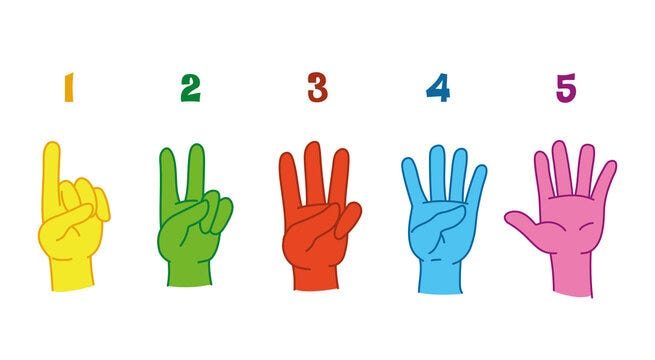

In [5]:
import mediapipe as mp
import numpy as np
import cv2
import cvzone
import warnings
warnings.filterwarnings("ignore")

import os
path = r"D:\Computer Vision\Real-Time Finger Counting with Computer Vision"
os.chdir(path=path)

my_hands = mp.solutions.hands
my_drawing = mp.solutions.drawing_utils
hands = my_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)


one_img = cv2.imread(r"1.png")
two_img = cv2.imread(r"2.png")
three_img = cv2.imread(r"3.png")
four_img = cv2.imread(r"4.png")
five_img = cv2.imread(r"5.png")
zero_img = cv2.imread(r"6.png")

finger_tips = [8, 12, 16, 20]
thumb_tip = 4

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error loading video.")
        break

    frame = cv2.resize(frame, (1020, 700))
    frame = cv2.flip(frame, 1)
    h, w, _ = frame.shape

    results = hands.process(frame)

    if results.multi_hand_landmarks:
        for ha_lan in results.multi_hand_landmarks:
            lm_list = []
            for lm in ha_lan.landmark:
                lm_list.append(lm)

            finger_fold_status = []
            for tip in finger_tips:
                x = int(lm_list[tip].x * w)
                y = int(lm_list[tip].y * h)

                cv2.circle(frame, (x, y), 15, (255, 0, 0), cv2.FILLED)

                
                if lm_list[tip].y < lm_list[tip - 2].y:
                    finger_fold_status.append(1)
                else:
                    finger_fold_status.append(0)

                    
            # Check thumb position separately
            if lm_list[thumb_tip].x < lm_list[thumb_tip - 2].x:
                finger_fold_status.insert(0, 1)
            else:
                finger_fold_status.insert(0, 0)

            # Get bounding box for the hand
            x_min = int(min([lm.x for lm in lm_list]) * w)
            y_min = int(min([lm.y for lm in lm_list]) * h)
            x_max = int(max([lm.x for lm in lm_list]) * w)
            y_max = int(max([lm.y for lm in lm_list]) * h)
            
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 0), 3)
            
            cvzone.putTextRect(frame, f"Number Of Fingers: {sum(finger_fold_status)}",
                                   (300, 50), scale=2, colorT=(0, 0, 0), thickness=2, colorR=(0, 255, 255))

            
            if sum(finger_fold_status) == 1 :
                cvzone.putTextRect(frame , "One" , (x_min , y_min - 20) , scale=3 , thickness=3 , colorT=(0,0,0) , colorR=(0,255,255))
                w , h , c = one_img.shape
                frame[35 : 35 + w , 30 : 30 +h] = one_img
                
                
            elif sum(finger_fold_status) == 2 :
                cvzone.putTextRect(frame , "Two" , (x_min , y_min - 20) , scale=3 , thickness=3 , colorT=(0,0,0) , colorR=(0,255,255))
                w , h , c = two_img.shape
                frame[35 : 35 + w , 30 : 30 +h] = two_img
                   
                    
            elif sum(finger_fold_status) == 3 :
                cvzone.putTextRect(frame , "Three" , (x_min , y_min - 20) , scale=3 , thickness=3 , colorT=(0,0,0) , colorR=(0,255,255))
                w , h , c = three_img.shape
                frame[35 : 35 + w , 30 : 30 +h] = three_img
                
                
            elif sum(finger_fold_status) == 4 :
                cvzone.putTextRect(frame , "Four" , (x_min , y_min - 20) , scale=3 , thickness=3 , colorT=(0,0,0) , colorR=(0,255,255))
                w , h , c = four_img.shape
                frame[35 : 35 + w , 30 : 30 +h] = four_img
                
                
            elif sum(finger_fold_status) == 5 :
                cvzone.putTextRect(frame , "Five" , (x_min , y_min - 20) , scale=3 , thickness=3 , colorT=(0,0,0) , colorR=(0,255,255))
                w , h , c = five_img.shape
                frame[35 : 35 + w , 30 : 30 +h] = five_img
                
                
            else :
                cvzone.putTextRect(frame , "Zero" , (x_min , y_min - 20) , scale=3 , thickness=3 , colorT=(0,0,0) , colorR=(0,255,255))
                w , h , c = zero_img.shape
                frame[35 : 35 + w , 30 : 30 +h] = zero_img
            
                    
        my_drawing.draw_landmarks(frame, ha_lan, my_hands.HAND_CONNECTIONS,
                                      my_drawing.DrawingSpec((0, 0, 255), 6, 3),
                                      my_drawing.DrawingSpec((0, 255, 0), 4, 2))

    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()
